In [2]:
#191137127_Sabeer-Saeed_Softwore-Engineering

# The following is on machine learning classification Library
# It Load Dataset to which Machine Learning read from a Database in excel
# It have Summarisation of Data to understand dataset (Descriptive Statistics)
# It has Visualisation of Data to understand dataset (Plots, Graphs etc.)
# It has Data pre-processing & Data transformation (split into train-test datasets)
# Application of a Machine Learning Algorithm to training dataset
# setup a ML algorithm and parameter settings 
# cross validation setup with training dataset 
# It perform training & fitting Algorithm with training Dataset 
# It perform Evaluation of trained Algorithm (or Model) and result 
# It saving the trained model for future prediction
# It Finalise the trained modela and make prediction
# 1 LOAD INITIALs

import pandas as pd
import numpy as np
import pickle as pk

# for dataset spliting
from sklearn.model_selection import train_test_split
#
from sklearn.model_selection import cross_val_score


# visualization
import matplotlib.pyplot as plt

#
from pandas.plotting import scatter_matrix

# 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
# 2 LOAD DATA

data = pd.read_csv('Iris.csv')
print(data)
data.head(2)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [12]:
# The following is for Summarization of dataset: Descriptive Stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [13]:
# Here it perform checking if there is any null values 
data.isnull().values.any()

False

In [14]:
# It determines How many classes of target col 'class'
data['Species'].unique()
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [15]:
# Here it is Data preprocessing

def pre_processing(data):
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']

    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest

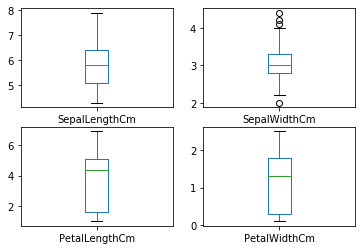

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0862D9B0>,
      dtype=object)

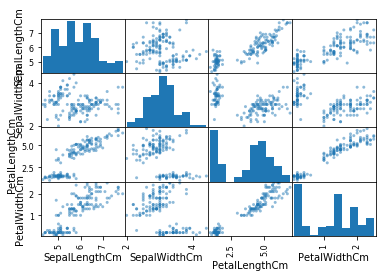

In [16]:
# This do the Data visualization

col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] #It Prints the Columns Sepal/petalGRam

data[col_names].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

plt.show()
scatter_matrix(data[col_names])
#Visualizing the data in form for anylysis review

In [17]:
# also another preprocessing or subpreprocessing
xtrain,xtest, ytrain, ytest = pre_processing(data)

Decision Tree Classification 0.9497920380273323
Naive Bayes Classification 0.9503862150920974
Suppor Vector Machine Classification 0.9797979797979798
[array([0.97058824, 0.96969697, 0.90909091]), array([0.91176471, 1.        , 0.93939394]), array([1.        , 0.96969697, 0.96969697])]


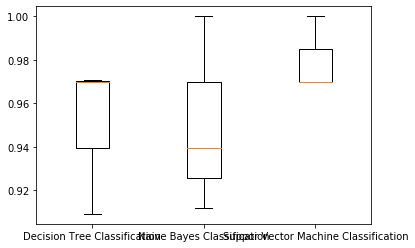

In [24]:
# This is performing the Designing Models for iris flower classification

np.random.seed(1000)
# making a list of machine learning classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('Decision Tree Classification',DecisionTreeClassifier()) ) #The decision tree Classification
    models.append( ('Naive Bayes Classification',  GaussianNB()) ) #The Naive Bayes Classification
    models.append( ('Suppor Vector Machine Classification',  SVC()) )#This is Support Vector Machine Classification

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes) #performs the printing function to the diagram for all the classification for analysis
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(xtrain,xtest, ytrain, ytest)

In [25]:
# Evaluating and predicting models, It determine the accurracy of the Model to print the Precision, recall, fi-score, support
#It also display Macro average, weight average

for name,model in models:
    trainedmodel = model.fit(xtrain,ytrain)
    
    # prediction
    ypredict = trainedmodel.predict(xtest)
    
    acc = accuracy_score(ytest,ypredict)
    classreport = classification_report(ytest,ypredict)
    confMat = confusion_matrix(ytest,ypredict)
    
    print('\n**************'+name+'**************')
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)
#The following is the Diplay of the all the three classifications with their Precision, recall, fi-score, and Support


**************Decision Tree Classification**************
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.94        50
      macro avg       0.93      0.94      0.93        50
   weighted avg       0.94      0.94      0.94        50

The Confusion Matrix:
 [[20  0  0]
 [ 0 12  1]
 [ 0  2 15]]

**************Naive Bayes Classification**************
The accuracy: 0.92
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.85      0.85      0.85        13
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.92        50
      macro avg       0.91      0.91      0

C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#The above result shows that Support Vector Machine Classification the is winner with some leading results.
#The SVM is recommend because is has the highest level of frequency
#But let further add more funtion to see the accuracy of Training data and Test dat

In [27]:
data = pd.read_csv('Iris.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [28]:
#Defining data and label
X = data.iloc[:, 1:5]
y = data.iloc[:, 5]

In [29]:
#calling Split data into training and test datasets (training will be based on 70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [31]:
#let Scale the Data
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
#Applying Decision Tree do display it Traing and test accuracy
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

#Train DT based on scaled training set
decision_tree.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std, y_test)))


The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.98


In [33]:
#Applying SVC (Support Vector Classification) to display the accuracy SVM training and test
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
#It Print the Performance of SVM
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 0.98


In [35]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

#It Print the performance
print('The accuracy of the Naive Bayes classifier on training data is {:.2f}'.format(nv.score(X_train_std, y_train)))
print('The accuracy of the Naive Bayes classifier on test data is {:.2f}'.format(nv.score(X_test_std, y_test)))

The accuracy of the Naive Bayes classifier on training data is 0.30
The accuracy of the Naive Bayes classifier on test data is 0.38


In [ ]:
# The Conclution is that after Loading the Library of the Datasets from all Indication shows that SVM Has more accuracy
# Even on the training data and the test data
# The Machine Learning Algorithm was applied from a CSV file with the name 'datasets.csv' inside the relavant folder
# The Summarisation of Data is to understand dataset (Descriptive Statistics)
# The Visualisation of Data also is to understand dataset (Plots, Graphs etc.) for easy analysis and reports
# Data pre-processing & Data covertion is to (split into train-test datasets)
# Application of a Machine Learning Algorithm to training dataset 
# ML algorithm and parameter settings were okay 
# Model Selection setup with training dataset was successful 
# training, fitting Algorithm with training Dataset fine
# it also evaluate the trained Algorithm (or Model) and result
# saving the trained model for future prediction
#Finalise the trained modela and make prediction
# Thank You Sir